# 1. Порождающие паттерны

- Простая фабрика (Simple Factory)
- Фабричный метод (Factory Method)
- Строитель (Builder)
- Одиночка (Singleton)

## 1.1 Простая фабрика (Simple Factory)

Фабрика — это общая концепция проектирования функций, методов и классов, когда какая-то одна часть программы отвечает за создание других частей программы.

Простая фабрика - это объект для создания других объектов. Простая фабрика генерирует экземпляр для клиента, не раскрывая никакой логики.

В общем виде фабрика выглядит как класс, в котором есть один метод с большим условным оператором, выбирающим создаваемый продукт. Этот метод вызывают с неким параметром, по которому определяется какой из продуктов нужно создать. У простой фабрики, обычно, нет подклассов.

Обычно, простую фабрику путают с общим понятием Фабрики или с любым из фабричных паттернов.

К примеру к нас есть класс автомобиля, который напичкан всеми нужными методами, относящимся к данному средству передвижения. Скорее всего, создавать данный объект вы будете следующим образом:

```
car = Car()
```

Со временем в процессе создания объекта Car нужно будет вводить некоторые изменения. К примеру создавать объект автомобиля нужно согласно определённым типам. Таким образом нам нужно будет менять код везде, где до тех пор создавался объект класса Car.

Через некоторое время ситуация может измениться ещё раз и ещё раз.

Чтобы не менять код проекта раз за разом целесообразно создать отдельный класс по шаблону Фабрика.

In [ ]:
import random

class Shape(object):
    # Create shape object based on class name:
    @staticmethod
    def create(shape_name):
        if shape_name == "Circle": return Circle()
        if shape_name == "Square": return Square()
        assert 0, "Bad shape name: %s" % shape_name

class Circle(Shape):
    def draw(self): print("Circle.draw")
    def erase(self): print("Circle.erase")

class Square(Shape):
    def draw(self): print("Square.draw")
    def erase(self): print("Square.erase")

shapes = [
    Shape.create("Circle"),
    Shape.create("Square")
]

for shape in shapes:
    shape.draw()
    shape.erase()

## 1.2 Фабричный метод (Factory Method)

Еще один паттерн, порождающий классы. Он предлагает такое устройство классов, при котором подклассы могут переопределять тип создаваемого объекта. Можно применять, когда заранее неизвестны типы объектов и их зависимости.

Фабричный метод отделяет код производства продуктов от остального кода, который эти продукты использует. Благодаря этому, код производства можно расширять, не трогая основной. Так, чтобы добавить поддержку нового продукта, нам нужно создать новый подкласс и определить в нём фабричный метод, возвращая оттуда экземпляр нового продукта.


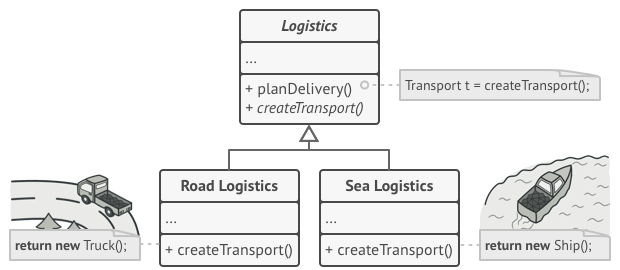

In [ ]:
class Document(object):
    def show(self):
        raise NotImplementedError()


class ODFDocument(Document):
    def show(self):
        print('Open document format')


class MSOfficeDocument(Document):
    def show(self):
        print('MS Office document format')


class Application(object):
    def create_document(self, type_):
        # параметризованный фабричный метод `create_document`
        raise NotImplementedError()


class MyApplication(Application):
    def create_document(self, type_):
        if type_ == 'odf':
            return ODFDocument()
        elif type_ == 'doc':
            return MSOfficeDocument()


app = MyApplication()
app.create_document('odf').show()  # Open document format
app.create_document('doc').show()  # MS Office document format

Один из вариантов, когда стоит обратить внимание на этот паттерн - вы хотите дать возможность пользователям расширять части вашего фреймворка или библиотеки. Хорошим решением будет дать пользователям возможность расширять не только желаемые компоненты, но и классы, которые создают эти компоненты. А для этого создающие классы должны иметь конкретные создающие методы, которые можно определить.
    
Решением будет дать пользователям возможность расширять не только желаемые компоненты, но и классы, которые создают эти компоненты. А для этого создающие классы должны иметь конкретные создающие методы, которые можно определить.

Например, вы используете готовый UI-фреймворк для своего приложения. Но вот беда — требуется иметь круглые кнопки, вместо стандартных прямоугольных. Вы создаёте класс RoundButton. Но как сказать главному классу фреймворка UIFramework, чтобы он теперь создавал круглые кнопки, вместо стандартных?

Для этого вы создаёте подкласс UIWithRoundButtons из базового класса фреймворка, переопределяете в нём метод создания кнопки (а-ля createButton) и вписываете туда создание своего класса кнопок. Затем используете UIWithRoundButtons вместо стандартного UIFramework.


Другой возможный вариант применение - когда вы хотите экономить системные ресурсы, повторно используя уже созданные объекты, вместо порождения новых.

Преимущества:
 - Избавляет класс от привязки к конкретным классам продуктов.
 - Выделяет код производства продуктов в одно место, упрощая поддержку кода.
 - Упрощает добавление новых продуктов в программу.
 - Реализует принцип открытости/закрытости.
 
Недостатки:
 - Может привести к созданию больших параллельных иерархий классов, так как для каждого класса продукта надо создать свой подкласс создателя.

## 1.3 Строитель (Builder)

Строитель — это порождающий паттерн проектирования, который позволяет создавать сложные объекты пошагово. Особенность паттерна строитель - возможность использовать один и тот же код строительства для получения разных представлений объектов.

Паттерн предлагает разбить процесс конструирования объекта на отдельные шаги (например, построитьСтены, вставитьДвери и другие). Чтобы создать объект, нам нужно поочерёдно вызывать методы строителя. Причём не обязательно запускать все шаги, а только те, что нужны для производства объекта определённой конфигурации.

Зачастую один и тот же шаг строительства может отличаться для разных вариаций производимых объектов. Например, деревянный дом потребует строительства стен из дерева, а каменный — из камня. В этом случае вы можете создать несколько классов строителей, выполняющих одни и те же шаги по-разному. Используя этих строителей в одном и том же строительном процессе, вы сможете получать на выходе различные объекты

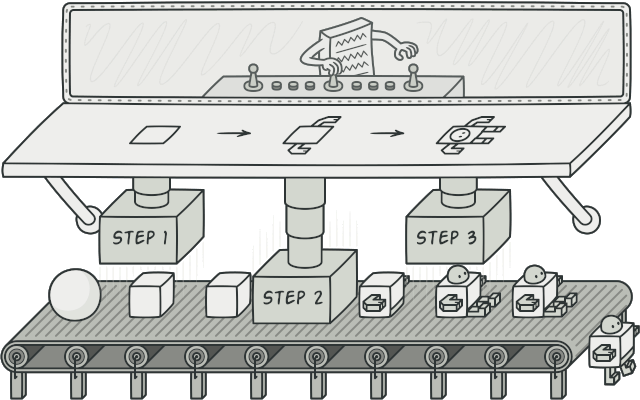

In [ ]:


class Builder(object):
    def build_body(self):
        raise NotImplementedError()

    def build_lamp(self):
        raise NotImplementedError()

    def build_battery(self):
        raise NotImplementedError()

    def create_flashlight(self):
        raise NotImplementedError()


class Flashlight(object):
    """Карманный фонарик"""
    def __init__(self, body, lamp, battery):
        self._shine = False  # излучать свет
        self._body = body
        self._lamp = lamp
        self._battery = battery

    def on(self):
        self._shine = True

    def off(self):
        self._shine = False

    def __str__(self):
        shine = 'on' if self._shine else 'off'
        return 'Flashlight [%s]' % shine


class Lamp(object):
    """Лампочка"""


class Body(object):
    """Корпус"""


class Battery(object):
    """Батарея"""


class FlashlightBuilder(Builder):
    def build_body(self):
        return Body()

    def build_battery(self):
        return Battery()

    def build_lamp(self):
        return Lamp()

    def create_flashlight(self):
        body = self.build_body()
        lamp = self.build_lamp()
        battery = self.build_battery()
        return Flashlight(body, lamp, battery)


builder = FlashlightBuilder()
flashlight = builder.create_flashlight()
flashlight.on()
print(flashlight)  # Flashlight [on]

Применимость:
- Для C++ подобных языков - решение проблемы «телескопического конструктора».
     
- Когда ваш код должен создавать разные представления какого-то объекта. Например, деревянные и железобетонные дома.

 Строитель можно применить, если создание нескольких представлений объекта состоит из одинаковых этапов, которые отличаются в деталях. Интерфейс строителей определит все возможные этапы конструирования. Каждому представлению будет соответствовать собственный класс-строитель.

- Когда вам нужно собирать сложные составные объекты.

 Строитель конструирует объекты пошагово, а не за один проход. Более того, шаги строительства можно выполнять рекурсивно. Обратите внимание, что Строитель не позволяет посторонним объектам иметь доступ к конструируемому объекту, пока тот не будет полностью готов. Это предохраняет клиентский код от получения незаконченных «битых» объектов.

Преимущества:
 - Позволяет создавать продукты пошагово.
 - Позволяет использовать один и тот же код для создания различных продуктов.
 - Изолирует сложный код сборки продукта от его основной бизнес-логики.

Недостатки:
 - Усложняет код программы из-за введения дополнительных классов.
 - Клиент будет привязан к конкретным классам строителей, так как в интерфейсе строителя может не быть метода получения результата.

## 1.4 Одиночка (Singleton)

Одиночка (Singleton) - паттерн, порождающий объекты. Гарантирует, что у класса есть только один экземпляр, и предоставляет к нему глобальную точку доступа. С помощью паттерна одиночка могут быть реализованы многие паттерны (абстрактная фабрика, строитель, прототип).

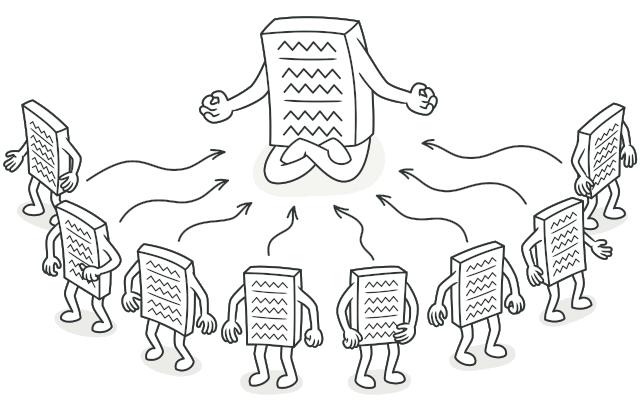

In [ ]:
class SingletonMeta(type):
    def __init__(cls, *args, **kwargs):
        cls._instance = None
        # глобальная точка доступа `Singleton.get_instance()`
        cls.get_instance = classmethod(lambda c: c._instance)
        super(SingletonMeta, cls).__init__(*args, **kwargs)

    def __call__(cls, *args, **kwargs):
        if not cls._instance:
            cls._instance = super(SingletonMeta, cls).__call__(*args, **kwargs)
        return cls._instance


class Singleton(object, metaclass=SingletonMeta):
    def __init__(self, name):
        self._name = name

    def get_name(self):
        return self._name


obj1 = Singleton('MyInstance 1')
print(obj1.get_name())  # MyInstance 1

obj2 = Singleton('MyInstance 2')
print(obj2.get_name())  # MyInstance 1

print(id(obj1), id(obj2))
print(obj1 is obj2 is Singleton.get_instance())  # True

## Применимость

- Когда в программе должен быть единственный экземпляр какого-то класса, доступный всем клиентам (например, общий доступ к базе данных из разных частей программы).

 Одиночка скрывает от клиентов все способы создания нового объекта, кроме специального метода. Этот метод либо создаёт объект, либо отдаёт существующий объект, если он уже был создан.

- Когда вам хочется иметь больше контроля над глобальными переменными.

 В отличие от глобальных переменных, Одиночка гарантирует, что никакой другой код не заменит созданный экземпляр класса, поэтому вы всегда уверены в наличии лишь одного объекта-одиночки.

## Преимущества
 - Гарантирует наличие единственного экземпляра класса.
 - Предоставляет к нему глобальную точку доступа.
 - Реализует отложенную инициализацию объекта-одиночки.
 
## Недостатки
 
 - Нарушает принцип единственной ответственности класса.
 - Маскирует плохой дизайн.
 - Проблемы мультипоточности.
 - Требует постоянного создания Mock-объектов при юнит-тестировании.

# 2. Структурные паттерны

Адаптер (Adapter) Python +

Фасад (Facade) Python +

Заместитель (Proxy) Python +

## 1.1 Адаптер (Adapter) Python

Адаптер - паттерн, структурирующий классы и объекты. Преобразует интерфейс одного класса в интерфейс другого, который ожидают клиенты.

Говоря простыми словами - адаптер обеспечивает совместную работу классов с несовместимыми интерфейсами, которая без него была бы невозможна.

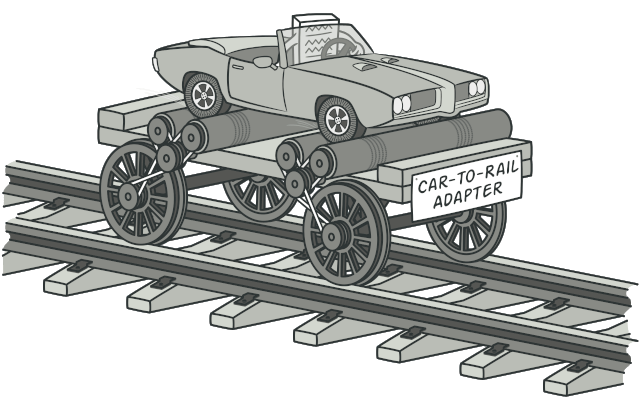

In [ ]:
class Dog(object):
    def __init__(self, name):
        self._name = name

    def bark(self):
        return '%s: гав-гав!' % self._name


class Cat(object):
    def __init__(self, name):
        self._name = name

    def meow(self):
        return '%s: мяу-мяу!' % self._name


class CatAdapter(Dog):
    # благодаря адаптеру мы можем использовать
    # интерфейс класса `Dog`, а реализацию класса `Cat`.

    def __init__(self, name):
        super(CatAdapter, self).__init__(name=name)
        self._cat = Cat(name=name)

    def bark(self):
        # запрос `bark` преобразуется в запрос `meow`
        return self._cat.meow()


dog = Dog('Тузик')
print(dog.bark())  # Тузик: гав-гав!

dog = CatAdapter('Тузик')
print(dog.bark())  # Тузик: мяу-мяу!

## Применение

- Когда мы хотим использовать сторонний класс, но его интерфейс не соответствует остальному коду приложения.

Адаптер позволяет создать объект-прокладку, который будет превращать вызовы приложения в формат, понятный стороннему классу.


- Когда нам нужно использовать несколько существующих подклассов, но в них не хватает какой-то общей функциональности, причём расширить суперкласс вы не можете.

Мы могли бы создать ещё один уровень подклассов и добавить в них недостающую функциональность. Но при этом придётся дублировать один и тот же код в обеих ветках подклассов.

Более элегантным решением было бы поместить недостающую функциональность в адаптер и приспособить его для работы с суперклассом. Такой адаптер сможет работать со всеми подклассами иерархии.

Преимущества
- Отделяет и скрывает от клиента подробности преобразования различных интерфейсов.

Недостатки
- Усложняет код программы из-за введения дополнительных классов.

## 1.2 Фасад (Facade)

Фасад (Facade) - это структурный паттерн проектирования, который предоставляет простой интерфейс к сложной системе классов, библиотеке или фреймворку.

In [ ]:
class Paper(object):
    """Бумага"""
    def __init__(self, count):
        self._count = count

    def get_count(self):
        return self._count

    def draw(self, text):
        if self._count > 0:
            self._count -= 1
            print(text)


class Printer(object):
    """Принтер"""
    def error(self, msg):
        print('Ошибка: %s' % msg)

    def print_(self, paper, text):
        if paper.get_count() > 0:
            paper.draw(text)
        else:
            self.error('Бумага закончилась')


class Facade(object):
    def __init__(self):
        self._printer = Printer()
        self._paper = Paper(1)

    def write(self, text):
        self._printer.print_(self._paper, text)


f = Facade()
f.write('Hello world!')  # Hello world!
f.write('Hello world!')  # Ошибка: Бумага закончилась

Применимость
 Когда вам нужно представить простой или урезанный интерфейс к сложной подсистеме.

 Часто подсистемы усложняются по мере развития программы. Применение большинства паттернов приводит к появлению меньших классов, но в бóльшем количестве. Такую подсистему проще повторно использовать, настраивая её каждый раз под конкретные нужды, но вместе с тем, применять подсистему без настройки становится труднее. Фасад предлагает определённый вид системы по умолчанию, устраивающий большинство клиентов.

 Когда вы хотите разложить подсистему на отдельные слои.

 Используйте фасады для определения точек входа на каждый уровень подсистемы. Если подсистемы зависят друг от друга, то зависимость можно упростить, разрешив подсистемам обмениваться информацией только через фасады.

Например, возьмём ту же сложную систему видеоконвертации. Вы хотите разбить её на слои работы с аудио и видео. Для каждой из этих частей можно попытаться создать фасад и заставить классы аудио и видео обработки общаться друг с другом через эти фасады, а не напрямую.

Преимущества
- Изолирует клиентов от компонентов сложной подсистемы.

Недостатки
- Фасад рискует стать божественным объектом, привязанным ко всем классам программы.

## 1.3 Заместитель (Proxy)

Заместитель (Proxy, Surrogate) - паттерн, структурирующий объекты.

Является суррогатом другого объекта и контролирует доступ к нему.  Паттерн позволяет подставлять вместо реальных объектов специальные объекты-заменители. Эти объекты перехватывают вызовы к оригинальному объекту, позволяя сделать что-то до или после передачи вызова оригиналу.

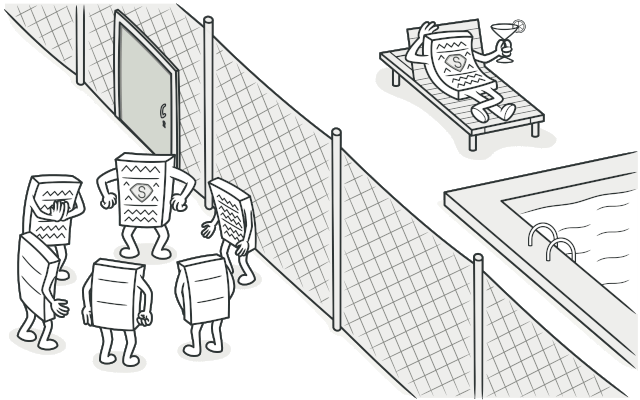

In [ ]:
from functools import partial


class ImageBase(object):
    """Абстрактное изображение"""
    @classmethod
    def create(cls, width, height):
        """Создает изображение"""
        return cls(width, height)

    def draw(self, x, y, color):
        """Рисует точку заданным цветом"""
        raise NotImplementedError()

    def fill(self, color):
        """Заливка цветом"""
        raise NotImplementedError()

    def save(self, filename):
        """Сохраняет изображение в файл"""
        raise NotImplementedError()


class Image(ImageBase):
    """Изображение"""
    def __init__(self, width, height):
        self._width = int(width)
        self._height = int(height)

    def draw(self, x, y, color):
        print 'Рисуем точку; координаты: (%d, %d); цвет: %s' % (x, y, color)

    def fill(self, color):
        print 'Заливка цветом %s' % color

    def save(self, filename):
        print 'Сохраняем изображение в файл %s' % filename


class ImageProxy(ImageBase):
    """
    Заместитель изображения.
    Откладывает выполнение операций над изображением до момента его сохранения.
    """
    def __init__(self, *args, **kwargs):
        self._image = Image(*args, **kwargs)
        self.operations = []

    def draw(self, *args):
        func = partial(self._image.draw, *args)
        self.operations.append(func)

    def fill(self, *args):
        func = partial(self._image.fill, *args)
        self.operations.append(func)

    def save(self, filename):
        # выполняем все операции над изображением
        map(lambda f: f(), self.operations)
        # сохраняем изображение
        self._image.save(filename)


img = ImageProxy(200, 200)
img.fill('gray')
img.draw(0, 0, 'green')
img.draw(0, 1, 'green')
img.draw(1, 0, 'green')
img.draw(1, 1, 'green')
img.save('image.png')

# Заливка цветом gray
# Рисуем точку; координаты: (0, 0); цвет: green
# Рисуем точку; координаты: (0, 1); цвет: green
# Рисуем точку; координаты: (1, 0); цвет: green
# Рисуем точку; координаты: (1, 1); цвет: green
# Сохраняем изображение в файл image.png

### Применение
- Ленивая инициализация (виртуальный прокси). Когда у вас есть тяжёлый объект, грузящий данные из файловой системы или базы данных.

Вместо того, чтобы грузить данные сразу после старта программы, можно сэкономить ресурсы и создать объект тогда, когда он действительно понадобится.

- Защита доступа (защищающий прокси). Когда в программе есть разные типы пользователей, и вам хочется защищать объект от неавторизованного доступа. Например, если ваши объекты — это важная часть операционной системы, а пользователи — сторонние программы (хорошие или вредоносные).

Прокси может проверять доступ при каждом вызове и передавать выполнение служебному объекту, если доступ разрешён.

- Локальный запуск сервиса (удалённый прокси). Когда настоящий сервисный объект находится на удалённом сервере.

В этом случае заместитель транслирует запросы клиента в вызовы по сети в протоколе, понятном удалённому сервису.

- Логирование запросов (логирующий прокси). Когда требуется хранить историю обращений к сервисному объекту.

Заместитель может сохранять историю обращения клиента к сервисному объекту.

- Кеширование объектов («умная» ссылка). Когда нужно кешировать результаты запросов клиентов и управлять их жизненным циклом.

Заместитель может подсчитывать количество ссылок на сервисный объект, которые были отданы клиенту и остаются активными. Когда все ссылки освобождаются, можно будет освободить и сам сервисный объект (например, закрыть подключение к базе данных).

Кроме того, Заместитель может отслеживать, не менял ли клиент сервисный объект. Это позволит использовать объекты повторно и здóрово экономить ресурсы, особенно если речь идёт о больших прожорливых сервисах.

Преимущества
- Позволяет контролировать сервисный объект незаметно для клиента.
- Может работать, даже если сервисный объект ещё не создан.
- Может контролировать жизненный цикл служебного объекта.

Недостатки
- Усложняет код программы из-за введения дополнительных классов.
- Увеличивает время отклика от сервиса.

# 3. Паттерны поведения

Цепочка обязанностей (Chain of Responsibility) +

Наблюдатель (Observer) +

Стратегия (Strategy) +

## 3.1 Цепочка обязанностей (Chain of Responsibility)

Цепочка обязанностей (Chain of Responsibility) - паттерн поведения объектов. Паттерн позволяет передавать запросы последовательно по цепочке обработчиков. Каждый последующий обработчик решает, может ли он обработать запрос сам и стоит ли передавать запрос дальше по цепи.

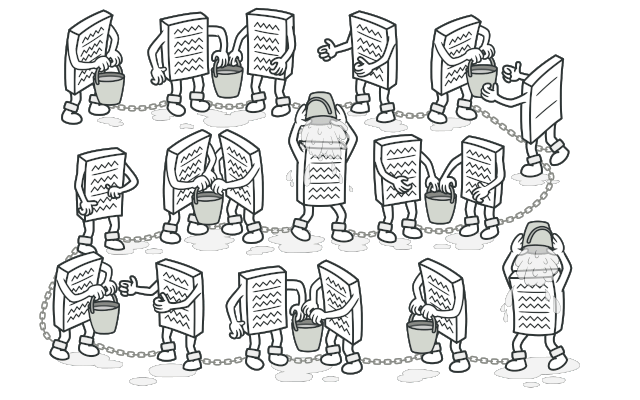

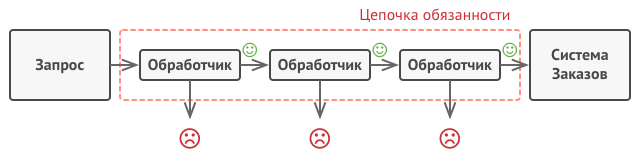

In [3]:
class HttpHandler(object):
    """Абстрактный класс обработчика"""
    def handle(self, code):
        raise NotImplementedError()


class Http404Handler(HttpHandler):
    """Обработчик для кода 404"""
    def handle(self, code):
        if code == 404:
            return 'Страница не найдена'


class Http500Handler(HttpHandler):
    """Обработчик для кода 500"""
    def handle(self, code):
        if code == 500:
            return 'Ошибка сервера'


class Client(object):
    def __init__(self):
        self._handlers = []

    def add_handler(self, h):
        self._handlers.append(h)

    def response(self, code):
        for h in self._handlers:
            msg = h.handle(code)
            if msg:
                print('Ответ: %s' % msg)
                break
        else:
            print('Код не обработан')


client = Client()
client.add_handler(Http404Handler())
client.add_handler(Http500Handler())
client.response(400)  # Код не обработан
client.response(404)  # Ответ: Страница не найдена
client.response(500)  # Ответ: Ошибка сервера

Код не обработан
Ответ: Страница не найдена
Ответ: Ошибка сервера


### Применимость
- Когда программа должна обрабатывать разнообразные запросы несколькими способами, но заранее неизвестно, какие конкретно запросы будут приходить и какие обработчики для них понадобятся.

С помощью Цепочки обязанностей вы можете связать потенциальных обработчиков в одну цепь и при получении запроса поочерёдно спрашивать каждого из них, не хочет ли он обработать запрос.

- Когда важно, чтобы обработчики выполнялись один за другим в строгом порядке.

Цепочка обязанностей позволяет запускать обработчиков последовательно один за другим в том порядке, в котором они находятся в цепочке.

- Когда набор объектов, способных обработать запрос, должен задаваться динамически.

 В любой момент вы можете вмешаться в существующую цепочку и переназначить связи так, чтобы убрать или добавить новое звено.

Преимущества
- Уменьшает зависимость между клиентом и обработчиками.
- Реализует принцип единственной обязанности.
- Реализует принцип открытости/закрытости.

Недостатки
- Запрос может остаться никем не обработанным.

## 3.7 Наблюдатель (Observer, Dependents, Publish-Subscribe)

Поведенческий паттерн проектирования, который создаёт механизм подписки, позволяющий одним объектам следить и реагировать на события, происходящие в других объектах.

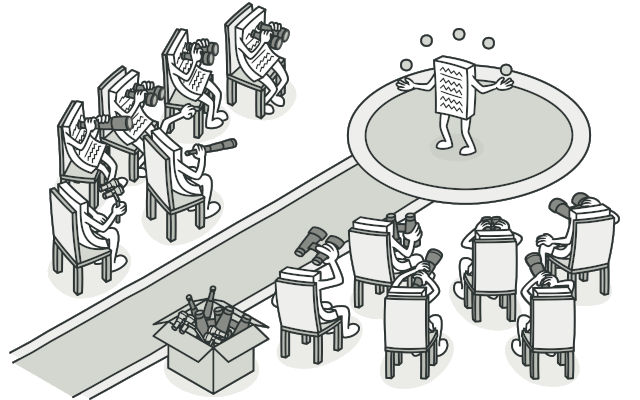

In [5]:
"""

"""


class Subject(object):
    """Субъект"""
    def __init__(self):
        self._data = None
        self._observers = set()

    def attach(self, observer):
        # подписаться на оповещение
        if not isinstance(observer, ObserverBase):
            raise TypeError()
        self._observers.add(observer)

    def detach(self, observer):
        # отписаться от оповещения
        self._observers.remove(observer)

    def get_data(self):
        return self._data

    def set_data(self, data):
        self._data = data
        self.notify(data)

    def notify(self, data):
        # уведомить всех наблюдателей о событии
        for observer in self._observers:
            observer.update(data)


class ObserverBase(object):
    """Абстрактный наблюдатель"""
    def update(self, data):
        raise NotImplementedError()


class Observer(ObserverBase):
    """Наблюдатель"""
    def __init__(self, name):
        self._name = name

    def update(self, data):
        print('%s: %s' % (self._name, data))


subject = Subject()
subject.attach(Observer('Наблюдатель 1'))
subject.attach(Observer('Наблюдатель 2'))
subject.set_data('данные для наблюдателя')
# Наблюдатель 2: данные для наблюдателя
# Наблюдатель 1: данные для наблюдателя

Наблюдатель 2: данные для наблюдателя
Наблюдатель 1: данные для наблюдателя


### Применение 
- Когда после изменения состояния одного объекта требуется что-то сделать в других, но вы не знаете наперёд, какие именно объекты должны отреагировать.

Описанная проблема может возникнуть при разработке библиотек пользовательского интерфейса, когда вам надо дать возможность сторонним классам реагировать на клики по кнопкам.

Паттерн Наблюдатель позволяет любому объекту с интерфейсом подписчика зарегистрироваться на получение оповещений о событиях, происходящих в объектах-издателях.

- Когда одни объекты должны наблюдать за другими, но только в определённых случаях.

Издатели ведут динамические списки. Все наблюдатели могут подписываться или отписываться от получения оповещений прямо во время выполнения программы.

Преимущества
- Издатели не зависят от конкретных классов подписчиков и наоборот.
- Вы можете подписывать и отписывать получателей на лету.
- Реализует принцип открытости/закрытости.

Недостатки
- Подписчики оповещаются в случайном порядке.

## 3.3 Стратегия (Strategy)

Определяет семейство алгоритмов, инкапсулирует каждый из них и делает их взаимозаменяемыми.

Стратегия позволяет изменять алгоритмы независимо от клиентов, которые ими пользуются

In [ ]:
class ImageDecoder(object):
    @staticmethod
    def decode(filename):
        raise NotImplementedError()


class PNGImageDecoder(ImageDecoder):
    @staticmethod
    def decode(filename):
        print 'PNG decode'


class JPEGImageDecoder(ImageDecoder):
    @staticmethod
    def decode(filename):
        print 'JPEG decode'


class GIFImageDecoder(ImageDecoder):
    @staticmethod
    def decode(filename):
        print 'GIF decode'


class Image(object):
    @classmethod
    def open(cls, filename):
        ext = filename.rsplit('.', 1)[-1]
        if ext == 'png':
            decoder = PNGImageDecoder
        elif ext in ('jpg', 'jpeg'):
            decoder = JPEGImageDecoder
        elif ext == 'gif':
            decoder = GIFImageDecoder
        else:
            raise RuntimeError('Невозможно декодировать файл %s' % filename)
        byterange = decoder.decode(filename)
        return cls(byterange, filename)

    def __init__(self, byterange, filename):
        self._byterange = byterange
        self._filename = filename

        
Image.open('picture.png')  # PNG decode
Image.open('picture.jpg')  # JPEG decode
Image.open('picture.gif')  # GIF decode

### Применение

- Когда вам нужно использовать разные вариации какого-то алгоритма внутри одного объекта.

Стратегия позволяет варьировать поведение объекта во время выполнения программы, подставляя в него различные объекты-поведения (например, отличающиеся балансом скорости и потребления ресурсов).

- Когда у вас есть множество похожих классов, отличающихся только некоторым поведением.

Стратегия позволяет вынести отличающееся поведение в отдельную иерархию классов, а затем свести первоначальные классы к одному, сделав поведение этого класса настраиваемым.

- Когда вы не хотите обнажать детали реализации алгоритмов для других классов.

Стратегия позволяет изолировать код, данные и зависимости алгоритмов от других объектов, скрыв эти детали внутри классов-стратегий.

- Когда различные вариации алгоритмов реализованы в виде развесистого условного оператора. Каждая ветка такого оператора представляет собой вариацию алгоритма.

 Стратегия помещает каждую лапу такого оператора в отдельный класс-стратегию. Затем контекст получает определённый объект-стратегию от клиента и делегирует ему работу. Если вдруг понадобится сменить алгоритм, в контекст можно подать другую стратегию.

Преимущества
- Горячая замена алгоритмов на лету.
- Изолирует код и данные алгоритмов от остальных классов.
- Уход от наследования к делегированию.
- Реализует принцип открытости/закрытости.

Недостатки
- Усложняет программу за счёт дополнительных классов.
- Клиент должен знать, в чём состоит разница между стратегиями, чтобы выбрать подходящую.